In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# import dataset
os.chdir('C:/Users/soumya/Desktop/BI/ml/ML-1/ML Project 2_ Automobile')
automobile = pd.read_csv('AutoData.csv')
print(automobile.info())
print(automobile.isna().sum())
print(automobile.head())
print(automobile.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [3]:
n = 1
for i in automobile.columns:
    print(str(n) + '.' + i)
    n += 1

1.symboling
2.make
3.fueltype
4.aspiration
5.doornumber
6.carbody
7.drivewheel
8.enginelocation
9.wheelbase
10.carlength
11.carwidth
12.carheight
13.curbweight
14.enginetype
15.cylindernumber
16.enginesize
17.fuelsystem
18.boreratio
19.stroke
20.compressionratio
21.horsepower
22.peakrpm
23.citympg
24.highwaympg
25.price


In [4]:
automobile.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,205,NaN,NaN,NaN,0.834146,1.24531,-2,0,1,2,3
make,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205,NaN,NaN,NaN,98.7566,6.02178,86.6,94.5,97,102.4,120.9
carlength,205,NaN,NaN,NaN,174.049,12.3373,141.1,166.3,173.2,183.1,208.1


In [5]:
cat_col = [n for n in automobile.columns if automobile[n].dtypes == 'object']
for i in cat_col:
    print(i)
    
print('\n\nTotal Categotical columns are', len(cat_col))

make
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


Total Categotical columns are 10


In [6]:
num_col = [n for n in automobile.columns if automobile[n].dtypes != 'object']
for i in num_col:
    print(i)
    
print('\n\nTotal numerical columns are', len(num_col))

symboling
wheelbase
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


Total numerical columns are 15


In [7]:
automobile.nunique()

symboling             6
make                147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

<Figure size 1440x720 with 0 Axes>

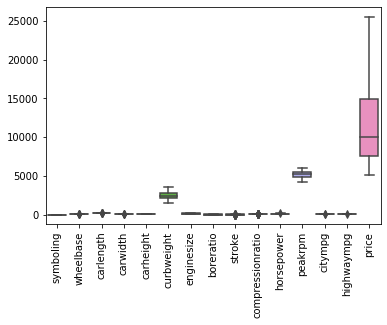

<Figure size 1440x720 with 0 Axes>

In [82]:
sns.boxplot(data=automobile)
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))


#### Dropping outliars

In [83]:
automobile.drop(automobile[automobile['price'] > 28000].index, inplace=True)
automobile.drop(automobile[automobile['peakrpm'] > 6000].index, inplace=True)
automobile.shape

(186, 25)

#### Perform EDA on the data 

<Figure size 1440x720 with 0 Axes>

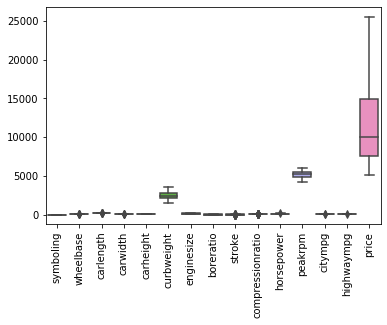

<Figure size 1440x720 with 0 Axes>

In [84]:
sns.boxplot(data=automobile)
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))

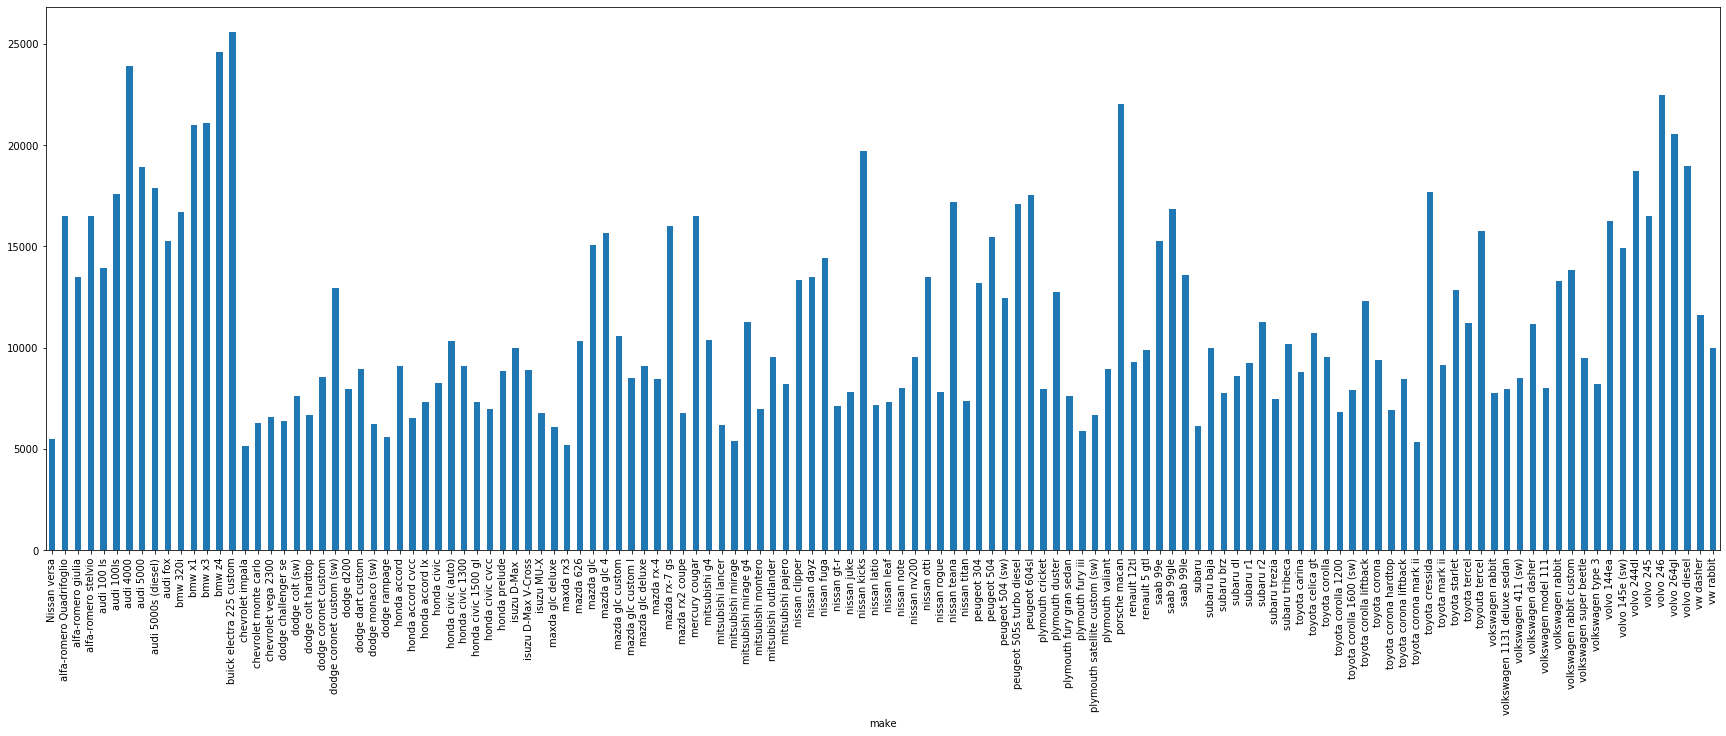

In [85]:

plt.figure(figsize=(30,10))
automobile['price'].groupby(automobile['make']).mean().plot(kind = 'bar')
plt.xticks(rotation=90)
plt.show()

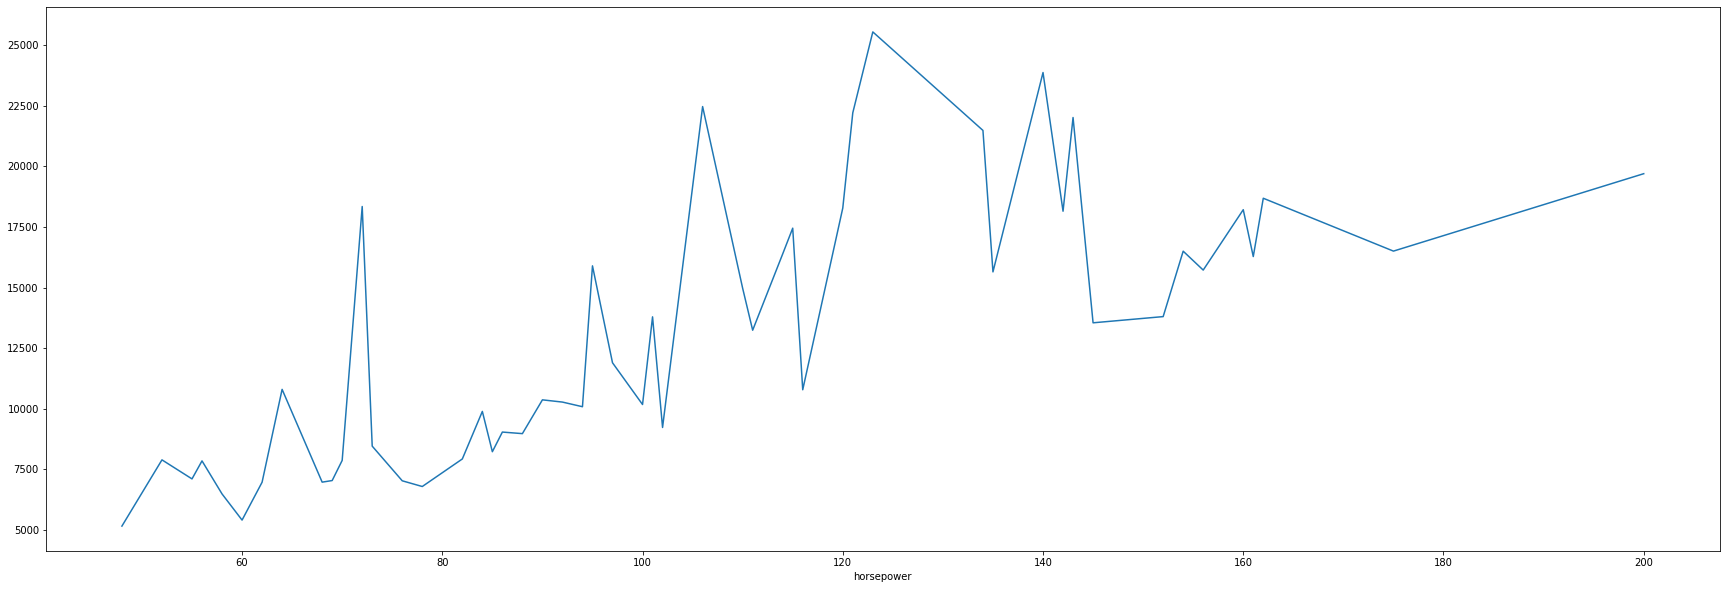

In [86]:
plt.figure(figsize=(30,10))
automobile['price'].groupby(automobile['horsepower']).mean().plot(kind = 'line')
plt.show()

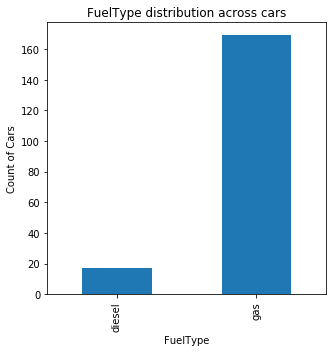

In [87]:
plt.figure(figsize =(5,5))
automobile.groupby(["fueltype"])["make"].agg("count").plot(kind = 'bar')
plt.title('FuelType distribution across cars')
plt.xlabel('FuelType')
plt.ylabel('Count of Cars')
plt.show()

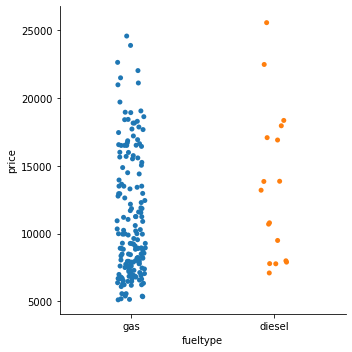

In [88]:
sns.catplot(x="fueltype", y="price", data=automobile)
plt.show()

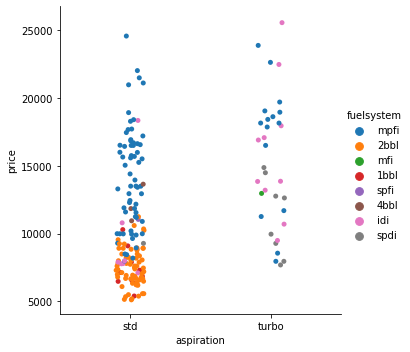

In [89]:
sns.catplot(x="aspiration", y="price", data=automobile, hue = "fuelsystem")
plt.show()

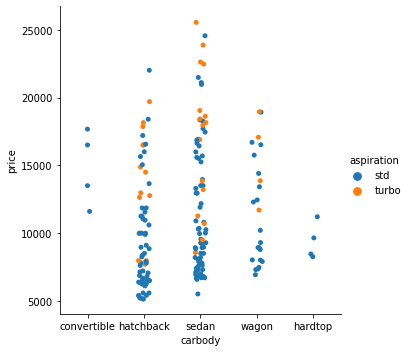

In [90]:
sns.catplot(x="carbody", y="price", data=automobile, hue = "aspiration")
plt.show()

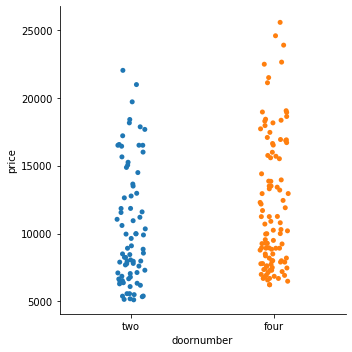

In [91]:
sns.catplot(x="doornumber", y="price", data=automobile)
plt.show()

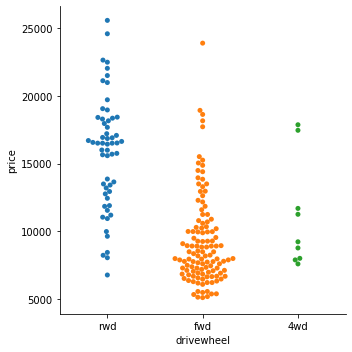

In [92]:
sns.catplot(x="drivewheel", y="price", data=automobile,  kind="swarm")
plt.show()

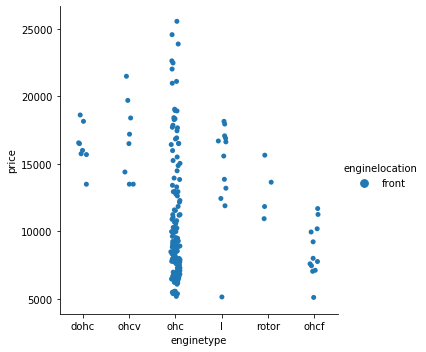

In [93]:
sns.catplot(x="enginetype", y="price", data=automobile, hue = "enginelocation")
plt.show()

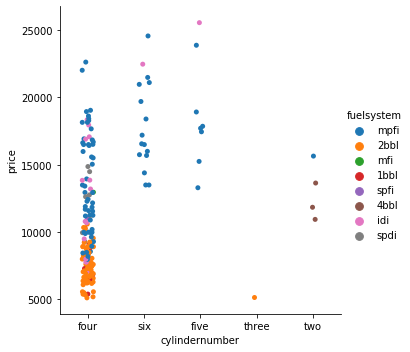

In [94]:
sns.catplot(x="cylindernumber", y="price", data=automobile, hue = "fuelsystem")
plt.show()

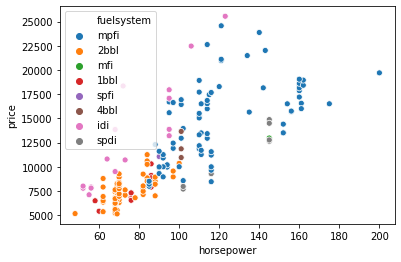

In [95]:
sns.scatterplot(x="horsepower", y="price", data=automobile, hue = "fuelsystem")
plt.show()

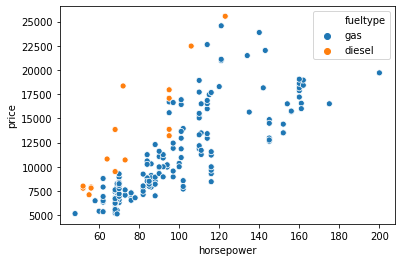

In [96]:
sns.scatterplot(x="horsepower", y="price", data=automobile, hue = "fueltype")
plt.show()

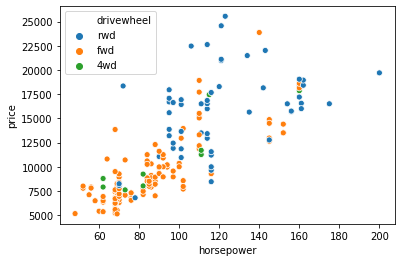

In [97]:
sns.scatterplot(x="horsepower", y="price", data=automobile, hue = "drivewheel")
plt.show()

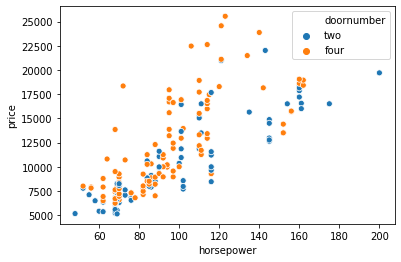

In [98]:
sns.scatterplot(x="horsepower", y="price", data=automobile, hue = "doornumber")
plt.show()

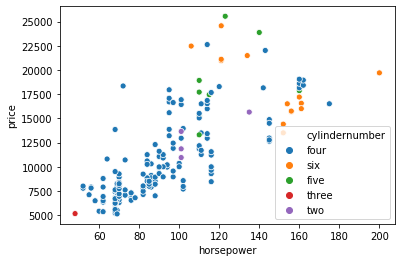

In [99]:
sns.scatterplot(x="horsepower", y="price", data=automobile, hue = "cylindernumber")
plt.show()

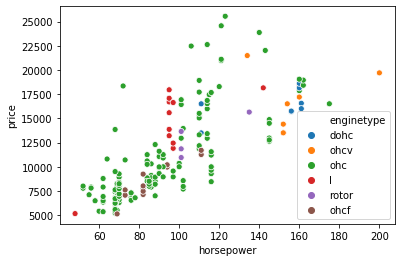

In [100]:
sns.scatterplot(x="horsepower", y="price", data=automobile, hue = "enginetype")
plt.show()

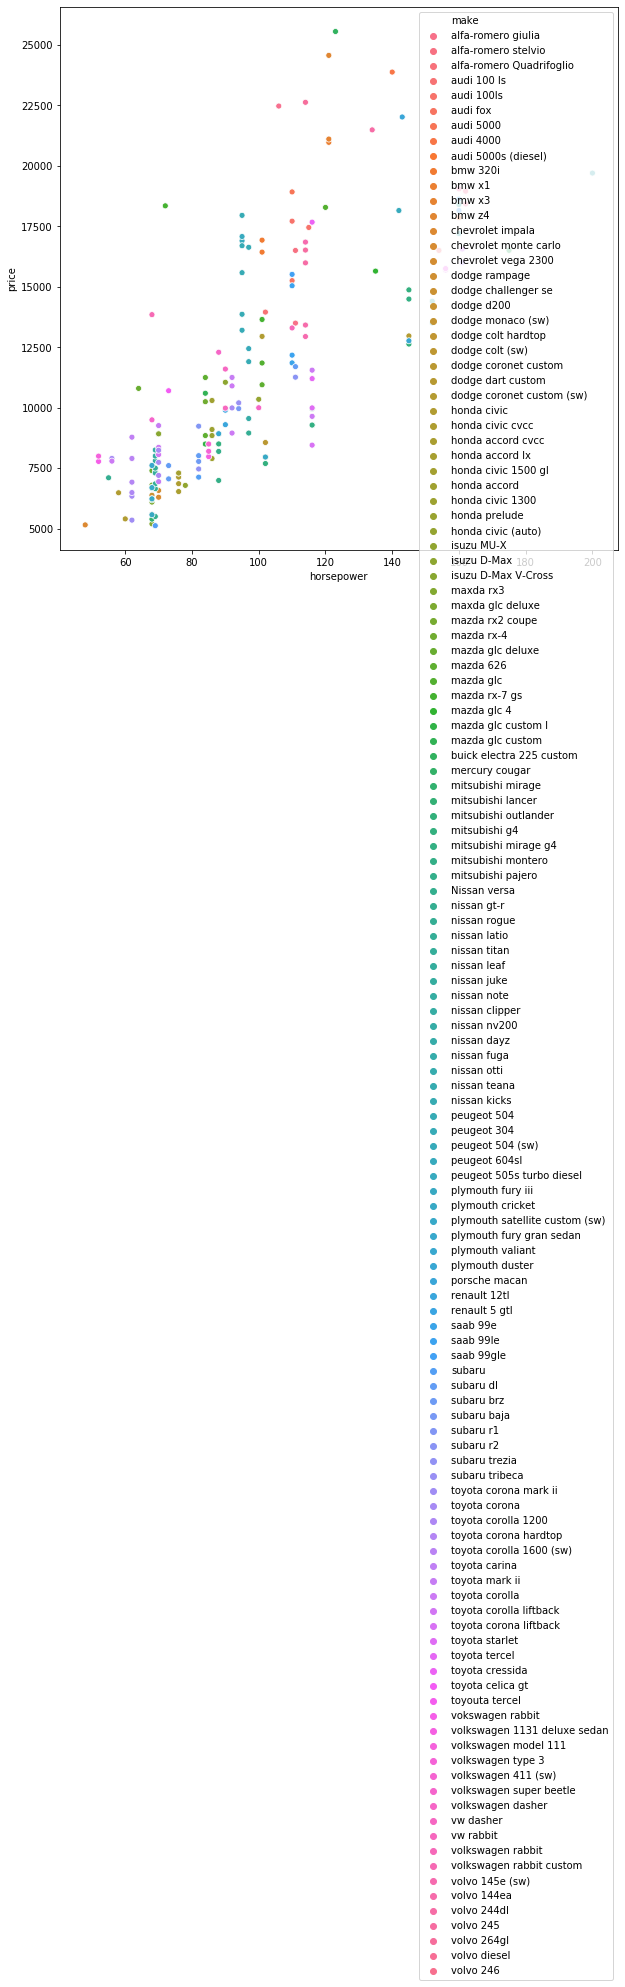

In [101]:
plt.figure(figsize =(10,10))

sns.scatterplot(x="horsepower", y="price", data=automobile, hue = "make")
plt.show()

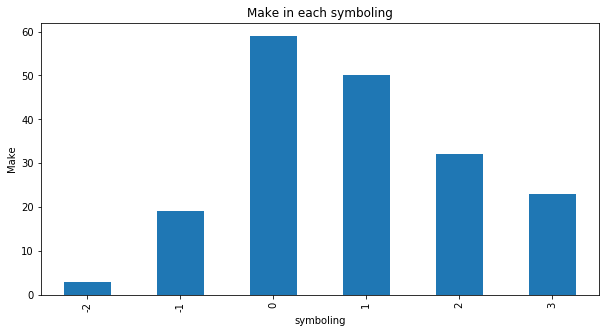

In [102]:
plt.figure(figsize =(10,5))
automobile.groupby(["symboling"])["make"].agg("count").plot(kind = 'bar')
plt.title('Make in each symboling')
plt.xlabel('symboling')
plt.ylabel('Make')
plt.show()

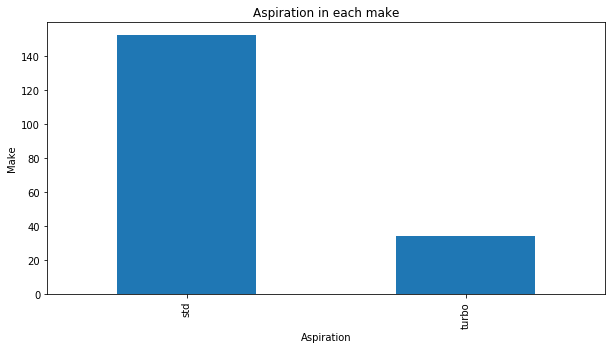

In [103]:
plt.figure(figsize =(10,5))
automobile.groupby(["aspiration"])["make"].agg("count").plot(kind = 'bar')
plt.title('Aspiration in each make')
plt.xlabel('Aspiration')
plt.ylabel('Make')
plt.show()

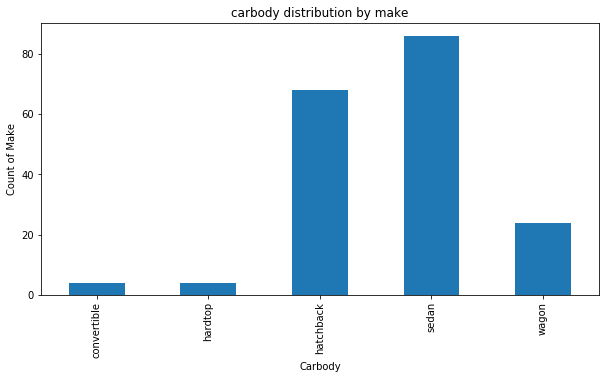

In [104]:
plt.figure(figsize =(10,5))
automobile.groupby(["carbody"])["make"].agg("count").plot(kind = 'bar')
plt.title('carbody distribution by make')
plt.xlabel('Carbody')
plt.ylabel('Count of Make')
plt.show()

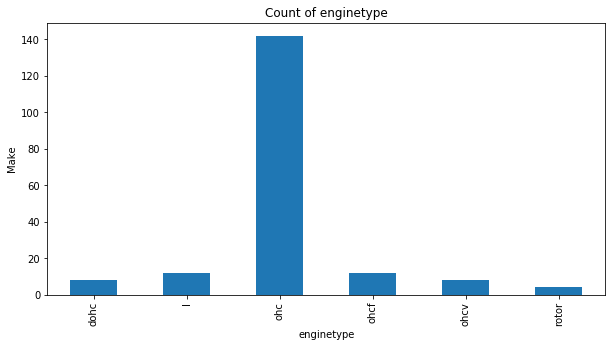

In [105]:
plt.figure(figsize =(10,5))
automobile.groupby(["enginetype"])["make"].agg("count").plot(kind = 'bar')
plt.title('Count of enginetype')
plt.xlabel('enginetype')
plt.ylabel('Make')
plt.show()

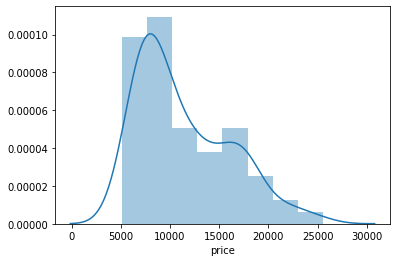

In [106]:
sns.distplot(automobile['price'])
plt.show()

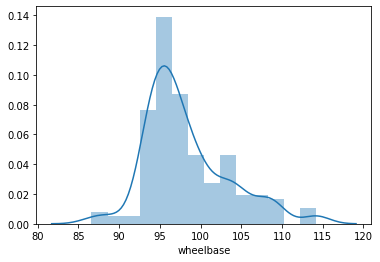

In [107]:
sns.distplot(automobile['wheelbase'])
plt.show()

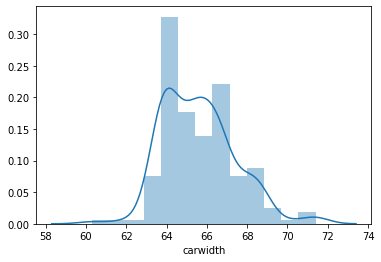

In [108]:
sns.distplot(automobile['carwidth'])
plt.show()

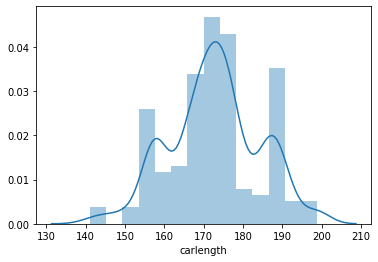

In [109]:
sns.distplot(automobile['carlength'])
plt.show()

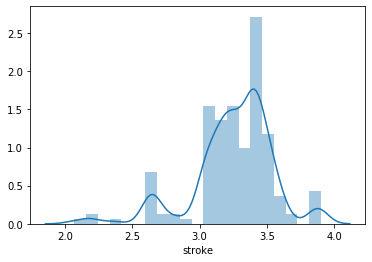

In [110]:
sns.distplot(automobile['stroke'])
plt.show()

#### Pick the best variable for making a simple linear regression model 

In [111]:
automobile.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.501178,-0.315725,-0.188226,-0.534643,-0.199165,-0.100877,-0.146711,0.072152,-0.149825,0.086364,0.234029,-0.054031,0.006943,-0.096067
wheelbase,-0.501178,1.000000,0.856344,0.784072,0.624427,0.770135,0.546585,0.503670,0.026487,0.261364,0.374304,-0.272626,-0.453991,-0.508245,0.651349
carlength,-0.315725,0.856344,1.000000,0.832309,0.524711,0.870843,0.677911,0.593097,0.038923,0.156153,0.562703,-0.234666,-0.644547,-0.661660,0.730880
carwidth,-0.188226,0.784072,0.832309,1.000000,0.320938,0.827144,0.674889,0.521259,0.133004,0.164643,0.611458,-0.128101,-0.614096,-0.636960,0.774648
carheight,-0.534643,0.624427,0.524711,0.320938,1.000000,0.367744,0.150029,0.201132,-0.128043,0.250643,-0.049760,-0.296603,-0.073189,-0.124031,0.224366
curbweight,-0.199165,0.770135,0.870843,0.827144,0.367744,1.000000,0.826830,0.624023,0.090272,0.141051,0.744571,-0.228863,-0.735586,-0.767564,0.842706
enginesize,-0.100877,0.546585,0.677911,0.674889,0.150029,0.826830,1.000000,0.573624,0.246289,0.053046,0.769707,-0.294043,-0.616111,-0.627780,0.730084
boreratio,-0.146711,0.503670,0.593097,0.521259,0.201132,0.624023,0.573624,1.000000,-0.095209,-0.009116,0.494352,-0.303572,-0.523660,-0.539575,0.494481
stroke,0.072152,0.026487,0.038923,0.133004,-0.128043,0.090272,0.246289,-0.095209,1.000000,0.175080,0.134122,0.030420,-0.019649,-0.004116,0.033599
compressionratio,-0.149825,0.261364,0.156153,0.164643,0.250643,0.141051,0.053046,-0.009116,0.175080,1.000000,-0.272251,-0.445293,0.368140,0.315345,0.092655


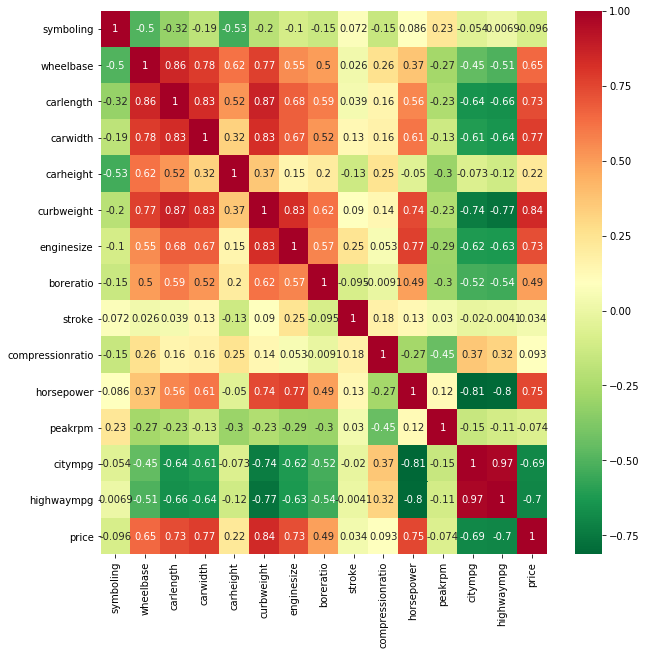

In [112]:
plt.figure(figsize = (10,10))
sns.heatmap(automobile.corr(), cmap = 'RdYlGn_r', annot = True)

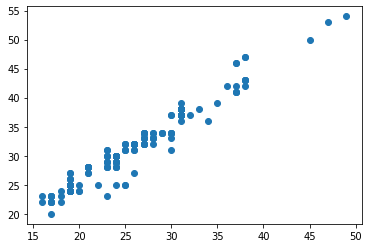

In [113]:
plt.scatter(automobile['citympg'], automobile['highwaympg'])
plt.show()

#High co-relation between them is present.

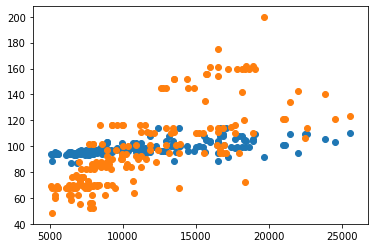

In [114]:
plt.scatter(automobile['price'], automobile['wheelbase'])
plt.scatter(automobile['price'], automobile['horsepower'])

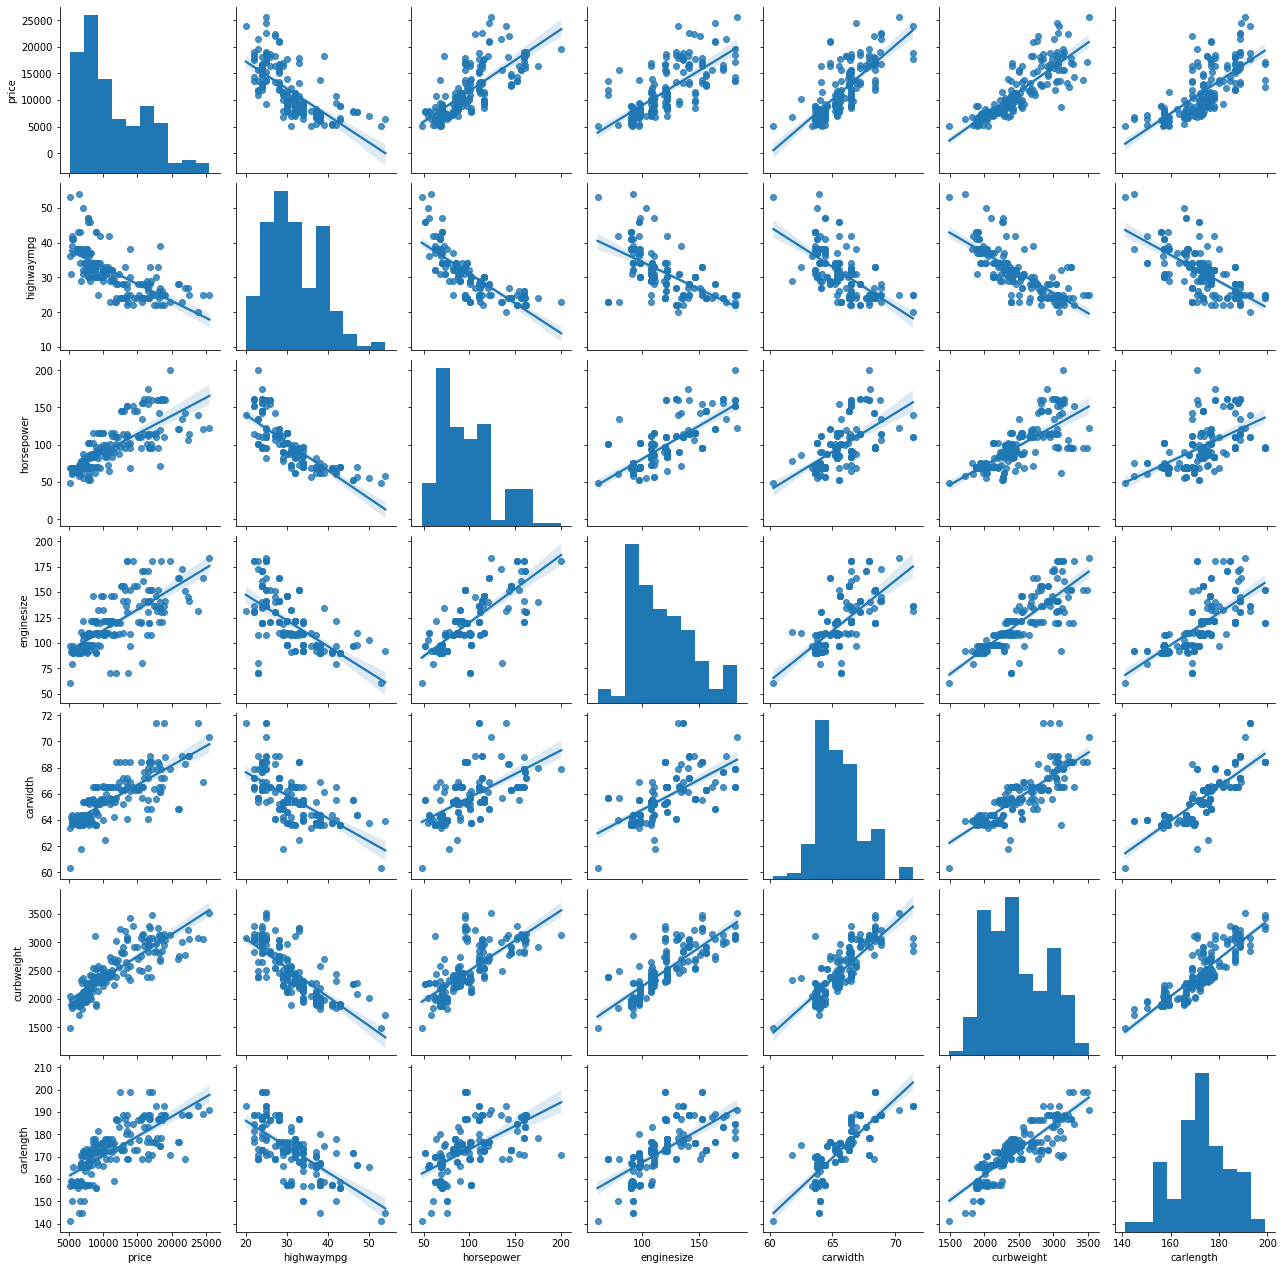

In [115]:
sns.pairplot(automobile, vars=['price', 'highwaympg', 'horsepower', 'enginesize','carwidth','curbweight','carlength'], 
             kind = 'reg')
plt.show()

#### Pick the best variable for making a simple linear regression model

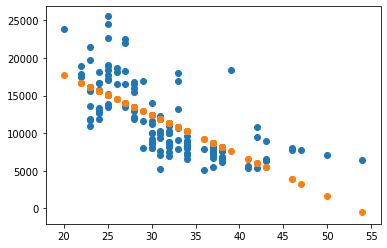

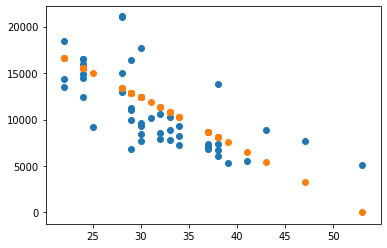

The Linear Regression intercept is [28387.71262859]
The Linear Regression coeff is [[-533.93491075]]


The mean squared error is 11552613.3503918
The R2 score on train is 0.5068887346691546

The Mean squared error Test is 10482186.68020435
R2 score Test is 0.3991276510753421


In [116]:
X = automobile['highwaympg']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 31)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)


plt.show()

print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))



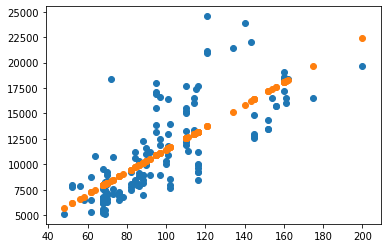

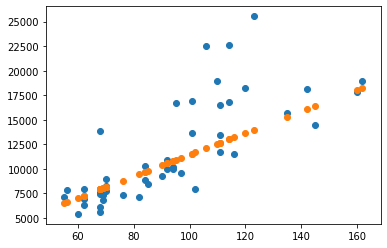

The Linear Regression intercept is [435.50644243]
The Linear Regression coeff is [[110.11334246]]


The mean squared error is 8796018.024590356
The R2 score on train is 0.5727771817848133

The Mean squared error Test is 12506812.430983206
R2 score Test is 0.5203991846179532


In [117]:
X = automobile['horsepower']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()

print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


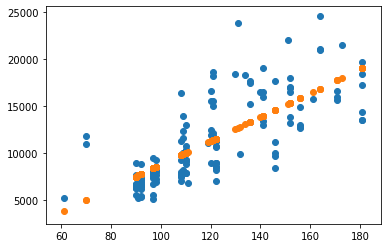

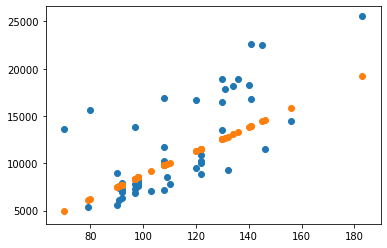

The Linear Regression intercept is [-3931.06134797]
The Linear Regression coeff is [[126.79667092]]


The mean squared error is 8873022.713897843
The R2 score on train is 0.5690370620749903

The Mean squared error Test is 14914206.591754852
R2 score Test is 0.4280824405375998


In [118]:
X = automobile['enginesize']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()


print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


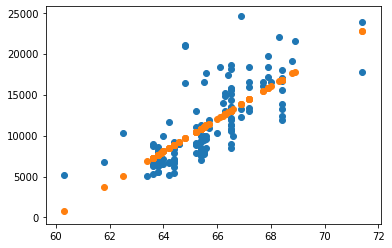

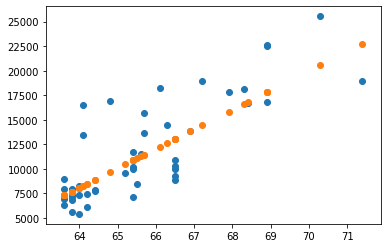

The Linear Regression intercept is [-119008.33036991]
The Linear Regression coeff is [[1985.69244334]]


The mean squared error is 8738478.574255172
The R2 score on train is 0.5755718743447908

The Mean squared error Test is 9057401.850444613
R2 score Test is 0.6526743055684731


In [119]:
X = automobile['carwidth']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()


print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


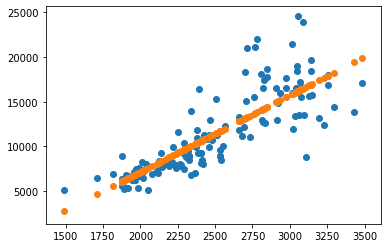

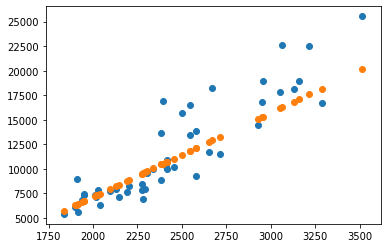

The Linear Regression intercept is [-10049.19029224]
The Linear Regression coeff is [[8.59107851]]


The mean squared error is 6584874.748354188
The R2 score on train is 0.680172466709229

The Mean squared error Test is 6126441.980805841
R2 score Test is 0.765068310922586


In [120]:
X = automobile['curbweight']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()


print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)


print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


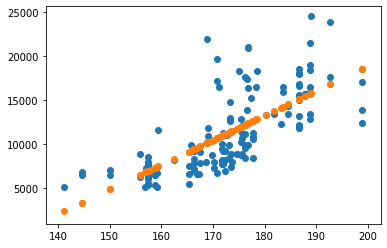

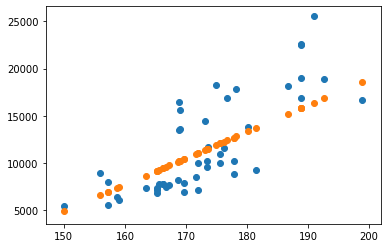

The Linear Regression intercept is [-37161.96211479]
The Linear Regression coeff is [[280.3809018]]


The mean squared error is 9976411.791123642
The R2 score on train is 0.5154454266505946

The Mean squared error Test is 11362876.869938936
R2 score Test is 0.5642658717413821


In [121]:
X = automobile['carlength']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()


print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


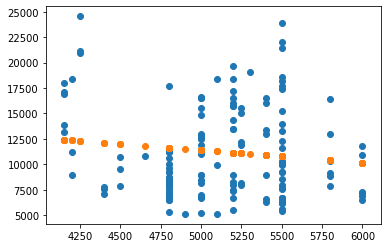

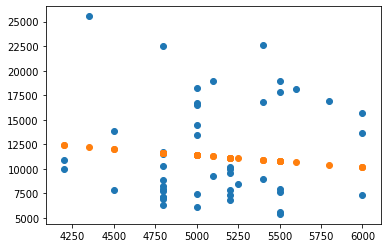

The Linear Regression intercept is [17539.69905824]
The Linear Regression coeff is [[-1.22927286]]


The mean squared error is 20285395.490641832
The R2 score on train is 0.014737827288018757

The Mean squared error Test is 26842273.019795727
R2 score Test is -0.029325105660795936


In [122]:
X = automobile['peakrpm']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()


print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


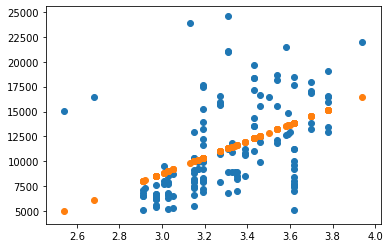

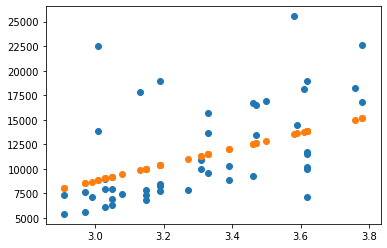

The Linear Regression intercept is [-15772.09360906]
The Linear Regression coeff is [[8184.73856542]]


The mean squared error is 15923888.999011513
The R2 score on train is 0.22657630804248674

The Mean squared error Test is 18881018.59117038
R2 score Test is 0.27596644136630555


In [123]:
X = automobile['boreratio']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()


print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


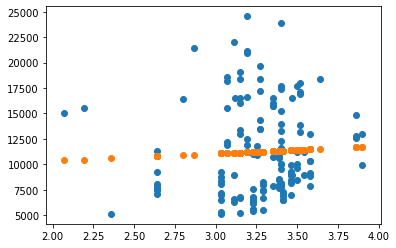

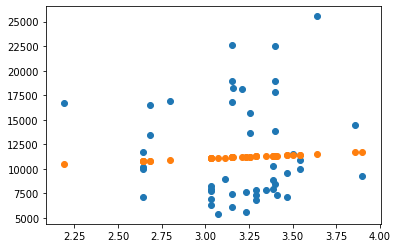

The Linear Regression intercept is [8887.47691473]
The Linear Regression coeff is [[720.3791059]]


The mean squared error is 20544923.595503323
The R2 score on train is 0.0021325406622975107

The Mean squared error Test is 26328148.31678771
R2 score Test is -0.009609880208157229


In [124]:
X = automobile['stroke']
y = automobile['price']

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 16)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

simp_reg = LinearRegression()
simp_reg.fit(X_train,y_train)

y_pred_train = simp_reg.predict(X_train)
y_pred_test = simp_reg.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
plt.show()

y_test_pred = simp_reg.predict(X_test)

plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_test_pred)

plt.show()


print('The Linear Regression intercept is', simp_reg.intercept_)
print('The Linear Regression coeff is',simp_reg.coef_)

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


### converting the categorical variables into dummy

In [125]:
# one-hoting coding
automobile_encoded = pd.get_dummies(automobile, columns=['make', 'fueltype','aspiration', 'doornumber','carbody', 'drivewheel',
                                              'enginelocation','enginetype','cylindernumber','fuelsystem'], prefix = 'dummies',
    drop_first=True)
     

print(automobile_encoded.head())

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  ...  dummies_six  \
0         130       3.47    2.68               9.0  ...            0   
1         130       3.47    2.68               9.0  ...            0   
2         152       2.68    3.47               9.0  ...            1   
3         109       3.19    3.40              10.0  ...            0   
4         136       3.19    3.40               8.0  ...            0   

   dummies_three  dummies_two  dummies_2bbl  dummies_4bbl  dummies_idi  \
0              0            0             0             0         

In [126]:
X = automobile_encoded[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                  'horsepower','peakrpm','citympg','highwaympg','symboling' ]]
y = automobile_encoded['price']

In [127]:
X = automobile[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                  'horsepower','peakrpm','citympg','highwaympg','symboling' ]]
y = automobile['price']

### Using RFE to select best features

In [128]:
from sklearn.feature_selection import RFE


#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.779950


In [129]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)          


#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Optimum number of features: 11
Score with 11 features: 0.779950
Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'citympg',
       'highwaympg', 'symboling'],
      dtype='object')


### RFE decided optumum number of features and name of features for us

In [130]:
#Adding constant column of ones, mandatory for sm.OLS model
import statsmodels.api as sm
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const               0.002655
wheelbase           0.030331
carlength           0.189019
carwidth            0.011593
carheight           0.807968
curbweight          0.023233
enginesize          0.217701
boreratio           0.096402
stroke              0.000427
compressionratio    0.000767
horsepower          0.000143
peakrpm             0.279661
citympg             0.026943
highwaympg          0.093023
symboling           0.664344
dtype: float64

### Backward elemination using P values

In [131]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['carwidth', 'curbweight', 'stroke', 'compressionratio', 'horsepower']


### Best values as per P Backward elemination and moving with VIF elemination

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2473.8,wheelbase
1,1896.1,carlength
2,3351.9,carwidth
3,981.5,carheight
4,435.3,curbweight
5,123.7,enginesize
6,291.6,boreratio
7,149.4,stroke
8,18.9,compressionratio
9,74.4,horsepower


### Trying multiple-regression without dummy variables

In [133]:
automobile_1 = automobile[['highwaympg', 'horsepower', 'wheelbase', 'enginesize','carwidth','curbweight','carlength',]]
y = automobile[['price']]

automobile_1.head()

,highwaympg,horsepower,wheelbase,enginesize,carwidth,curbweight,carlength
0,27,111,88.6,130,64.1,2548,168.8
1,27,111,88.6,130,64.1,2548,168.8
2,26,154,94.5,152,65.5,2823,171.2
3,30,102,99.8,109,66.2,2337,176.6
4,22,115,99.4,136,66.4,2824,176.6


In [134]:
# train-test split
from sklearn.model_selection import train_test_split
automobile_1_train,automobile_1_test,y_train,y_test = train_test_split(automobile_1,y,random_state = 11)

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(automobile_1_train,y_train)

print(multi_model.intercept_)
print(multi_model.coef_)


[-43267.98785121]
[[ -7.95238995  49.57344938  58.87729917   3.77827152 553.92238891
    4.21147217 -16.91101492]]


In [135]:
y_pred_train = multi_model.predict(automobile_1_train)
y_pred_test = multi_model.predict(automobile_1_test)

from sklearn.metrics import r2_score, mean_squared_error

print(mean_squared_error(y_train,y_pred_train))
print(r2_score(y_train,y_pred_train))

print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))


5076021.369059833
0.7648929705955767
5499150.044182349
0.7623352000282495


### Minmax scaling and buiding dummy for each cat variable sepately Then running it in mutiple regression equation

In [136]:
## Feature Scaling ##

minmax = MinMaxScaler()

minmax.fit(automobile_encoded)


automobile_encoded[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                  'horsepower','peakrpm','citympg','highwaympg', 'price']] =  minmax.fit_transform(automobile_encoded[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                  'horsepower','peakrpm','citympg','highwaympg', 'price']])
print(automobile_encoded.head())

n = 1
for i in automobile.columns:
    print(str(n) + '.' + i)
    n += 1

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3   0.072464   0.479239  0.342342   0.000000    0.522940   
1          3   0.072464   0.479239  0.342342   0.000000    0.522940   
2          1   0.286232   0.520761  0.468468   0.327273    0.658609   
3          2   0.478261   0.614187  0.531532   0.500000    0.418846   
4          2   0.463768   0.614187  0.549550   0.500000    0.659102   

   enginesize  boreratio    stroke  compressionratio  ...  dummies_six  \
0    0.565574   0.664286  0.333333            0.1250  ...            0   
1    0.565574   0.664286  0.333333            0.1250  ...            0   
2    0.745902   0.100000  0.765027            0.1250  ...            1   
3    0.393443   0.464286  0.726776            0.1875  ...            0   
4    0.614754   0.464286  0.726776            0.0625  ...            0   

   dummies_three  dummies_two  dummies_2bbl  dummies_4bbl  dummies_idi  \
0              0            0             0           

In [137]:
# Building Regression on standardized values

X = automobile_encoded.drop(automobile_encoded.iloc[:,0:22], axis = 1)
print(X.head())
y = automobile_encoded['price']
print('\n\n Y is',y.head())

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 18)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

   dummies_audi 5000s (diesel)  dummies_audi fox  dummies_bmw 320i  \
0                            0                 0                 0   
1                            0                 0                 0   
2                            0                 0                 0   
3                            0                 0                 0   
4                            0                 0                 0   

   dummies_bmw x1  dummies_bmw x3  dummies_bmw z4  \
0               0               0               0   
1               0               0               0   
2               0               0               0   
3               0               0               0   
4               0               0               0   

   dummies_buick electra 225 custom  dummies_chevrolet impala  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   


In [138]:
X = automobile_encoded[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                  'horsepower','peakrpm','citympg','highwaympg','symboling' ]]
y = automobile_encoded['price']

print(X.head())
len(X.index)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 56)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0   0.072464   0.479239  0.342342   0.000000    0.522940    0.565574   
1   0.072464   0.479239  0.342342   0.000000    0.522940    0.565574   
2   0.286232   0.520761  0.468468   0.327273    0.658609    0.745902   
3   0.478261   0.614187  0.531532   0.500000    0.418846    0.393443   
4   0.463768   0.614187  0.549550   0.500000    0.659102    0.614754   

   boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
0   0.664286  0.333333            0.1250    0.414474  0.459459  0.151515   
1   0.664286  0.333333            0.1250    0.414474  0.459459  0.151515   
2   0.100000  0.765027            0.1250    0.697368  0.459459  0.090909   
3   0.464286  0.726776            0.1875    0.355263  0.729730  0.242424   
4   0.464286  0.726776            0.0625    0.440789  0.729730  0.060606   

   highwaympg  symboling  
0    0.205882          3  
1    0.205882          3  
2    0.176471          1  
3 

In [139]:
X = automobile_encoded[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling' ]]
y = automobile_encoded['price']

print(X.head())
len(X.index)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 56)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

   wheelbase  carwidth  curbweight  boreratio    stroke  compressionratio  \
0   0.072464  0.342342    0.522940   0.664286  0.333333            0.1250   
1   0.072464  0.342342    0.522940   0.664286  0.333333            0.1250   
2   0.286232  0.468468    0.658609   0.100000  0.765027            0.1250   
3   0.478261  0.531532    0.418846   0.464286  0.726776            0.1875   
4   0.463768  0.549550    0.659102   0.464286  0.726776            0.0625   

   horsepower  highwaympg  symboling  
0    0.414474    0.205882          3  
1    0.414474    0.205882          3  
2    0.697368    0.176471          1  
3    0.355263    0.294118          2  
4    0.440789    0.058824          2  
-0.04421222858735052
[ 0.11640614  0.35851258  0.24035319 -0.06330428 -0.2306703   0.10992488
  0.54233148 -0.02002277  0.00751928]


The mean squared error is 0.010939945574768501
The R2 score on train is 0.7778145529618357
0.013148170873965385
0.7909881955744377


In [140]:
X = automobile_encoded[['carwidth','curbweight','stroke', 'horsepower','highwaympg']]
y = automobile_encoded['price']

print(X.head())
len(X.index)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 56)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

   carwidth  curbweight    stroke  horsepower  highwaympg
0  0.342342    0.522940  0.333333    0.414474    0.205882
1  0.342342    0.522940  0.333333    0.414474    0.205882
2  0.468468    0.658609  0.765027    0.697368    0.176471
3  0.531532    0.418846  0.726776    0.355263    0.294118
4  0.549550    0.659102  0.726776    0.440789    0.058824
-0.11391502277650123
[ 0.43018307  0.38305446 -0.20754099  0.43028586  0.06926862]


The mean squared error is 0.011508274586949358
The R2 score on train is 0.766272042555989
0.014987221351564859
0.7617534630449211


In [141]:
# one-hoting coding
make_dummies = pd.get_dummies(automobile['make'], prefix = 'dummies', drop_first = True)
print(make_dummies.head())

automobile_dummy = pd.concat([automobile_encoded,make_dummies], axis=1)
print(automobile_dummy.head())



X = automobile_dummy[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
                  'horsepower','peakrpm','citympg','symboling'] + make_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 56)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))



   dummies_alfa-romero Quadrifoglio  dummies_alfa-romero giulia  \
0                                 0                           1   
1                                 0                           0   
2                                 1                           0   
3                                 0                           0   
4                                 0                           0   

   dummies_alfa-romero stelvio  dummies_audi 100 ls  dummies_audi 100ls  \
0                            0                    0                   0   
1                            1                    0                   0   
2                            0                    0                   0   
3                            0                    1                   0   
4                            0                    0                   1   

   dummies_audi 4000  dummies_audi 5000  dummies_audi 5000s (diesel)  \
0                  0                  0                            0   
1 

In [142]:
# one-hoting coding
makecar_dummies = pd.get_dummies(automobile['carbody'], prefix = 'dummies', drop_first = True)
print(makecar_dummies.head())


X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + makecar_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))



   dummies_hardtop  dummies_hatchback  dummies_sedan  dummies_wagon
0                0                  0              0              0
1                0                  0              0              0
2                0                  1              0              0
3                0                  0              1              0
4                0                  0              1              0
Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_hardtop', 'dummies_hatchback', 'dummies_sedan',
       'dummies_wagon'],
      dtype='object')
0.004623191932609683
[ 0.19575387  0.20919924  0.4036175  -0.09940438 -0.12699551  0.03096274
  0.47189723  0.09111079  0.01496226 -0.23142257 -0.1716475  -0.12350542
 -0.20832308]


The mean squared error is 0.010060134436843182
The R2 score on train is 0.7959771112682463

The Mean squared error Test is 0.010234052891541062
R2 score Test is 

In [143]:
# one-hoting coding
fuelsystem_dummies = pd.get_dummies(automobile['fuelsystem'], prefix = 'dummies', drop_first = True)
print(fuelsystem_dummies.head())



X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + fuelsystem_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


   dummies_2bbl  dummies_4bbl  dummies_idi  dummies_mfi  dummies_mpfi  \
0             0             0            0            0             1   
1             0             0            0            0             1   
2             0             0            0            0             1   
3             0             0            0            0             1   
4             0             0            0            0             1   

   dummies_spdi  dummies_spfi  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_2bbl', 'dummies_4bbl', 'dummies_idi', 'dummies_mfi',
       'dummies_mpfi', 'dummies_spdi', 'dummies_spfi'],
      dtype='object')
-0.07051979279702653
[ 0.11495342  0.20899258  0.34876806 -0.08900344 -0.1084772  -0.

In [144]:
# one-hoting coding
fueltype_dummies = pd.get_dummies(automobile['fueltype'], prefix = 'dummies', drop_first = True)
print(fueltype_dummies.head())



X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + fueltype_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


   dummies_gas
0            1
1            1
2            1
3            1
4            1
Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_gas'],
      dtype='object')
-0.5008045343364238
[ 0.17597133  0.24660997  0.36692702 -0.10558128 -0.10656859  0.45241202
  0.47985824  0.02398159  0.01113561  0.32287537]


The mean squared error is 0.011223108114365096
The R2 score on train is 0.7723916163927458

The Mean squared error Test is 0.011441598731328472
R2 score Test is 0.8167994526899407


In [145]:
# one-hoting coding
aspiration_dummies = pd.get_dummies(automobile['aspiration'], prefix = 'dummies', drop_first = True)
print(aspiration_dummies.head())

X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + aspiration_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))



   dummies_turbo
0              0
1              0
2              0
3              0
4              0
Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_turbo'],
      dtype='object')
-0.13413836222936276
[ 0.18806118  0.2479107   0.33043533 -0.10641686 -0.12669987  0.09484317
  0.53531619  0.05140679  0.01180074 -0.03890451]


The mean squared error is 0.011249512233679143
The R2 score on train is 0.7718561320281292

The Mean squared error Test is 0.012367311870193068
R2 score Test is 0.8019771225528292


In [146]:
# one-hoting coding
cylindernumber_dummies = pd.get_dummies(automobile['cylindernumber'], prefix = 'dummies', drop_first = True)
print(cylindernumber_dummies.head())

X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + cylindernumber_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


   dummies_four  dummies_six  dummies_three  dummies_two
0             1            0              0            0
1             1            0              0            0
2             0            1              0            0
3             1            0              0            0
4             0            0              0            0
Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_four', 'dummies_six', 'dummies_three', 'dummies_two',
       'dummies_two'],
      dtype='object')
0.0074615711895851256
[ 0.21001621  0.15588068  0.33704266  0.00170931 -0.12174097  0.06047473
  0.45091327  0.13544302  0.01322064 -0.18907849 -0.10639712 -0.11889966
 -0.00458116 -0.12609224]


The mean squared error is 0.010276355894321867
The R2 score on train is 0.791592067843873

The Mean squared error Test is 0.011228991671611139
R2 score Test is 0.8202036736049383


In [147]:
# one-hoting coding
enginetype_dummies = pd.get_dummies(automobile['enginetype'], prefix = 'dummies', drop_first = True)
print(enginetype_dummies.head())

X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + enginetype_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))

   dummies_l  dummies_ohc  dummies_ohcf  dummies_ohcv  dummies_rotor
0          0            0             0             0              0
1          0            0             0             0              0
2          0            0             0             1              0
3          0            1             0             0              0
4          0            1             0             0              0
Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_l', 'dummies_ohc', 'dummies_ohcf', 'dummies_ohcv',
       'dummies_rotor'],
      dtype='object')
-0.2087556360961445
[ 0.17420323  0.20119089  0.43732382 -0.11302959 -0.26183889  0.10429679
  0.59106186  0.09104924  0.01091672  0.04412982  0.1269674   0.02274426
  0.01410154  0.14151285]


The mean squared error is 0.010268127553226016
The R2 score on train is 0.7917589413514176

The Mean squared error Test is 0.0098053699868694

In [148]:
# one-hoting coding
drivewheel_dummies = pd.get_dummies(automobile['drivewheel'], prefix = 'dummies', drop_first = True)
print(drivewheel_dummies.head())


X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + drivewheel_dummies.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))


   dummies_fwd  dummies_rwd
0            0            1
1            0            1
2            0            1
3            1            0
4            0            0
Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_fwd', 'dummies_rwd'],
      dtype='object')
-0.06581583459191948
[ 0.13723829  0.31878943  0.26984279 -0.15115129 -0.116851    0.06394611
  0.46050579  0.03793246  0.00921041 -0.02504784  0.04552905]


The mean squared error is 0.010880173652638866
The R2 score on train is 0.7793464418939653

The Mean squared error Test is 0.009685452362191161
R2 score Test is 0.8449185104839885


### Individual dummies are giving us good results but none above 90%. So we will make combimations of best dummies and incoporate them with selctive numberical vairbales and then R2 score to check

In [149]:
automobile_dummies_Test_combination_1 = pd.concat([ make_dummies,makecar_dummies,drivewheel_dummies])
automobile_dummies_Test_combination_1.head()

,dummies_alfa-romero Quadrifoglio,dummies_alfa-romero giulia,dummies_alfa-romero stelvio,dummies_audi 100 ls,dummies_audi 100ls,dummies_audi 4000,dummies_audi 5000,dummies_audi 5000s (diesel),dummies_audi fox,dummies_bmw 320i,...,dummies_volvo 264gl,dummies_volvo diesel,dummies_vw dasher,dummies_vw rabbit,dummies_hardtop,dummies_hatchback,dummies_sedan,dummies_wagon,dummies_fwd,dummies_rwd
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','compressionratio',
                  'horsepower','highwaympg','symboling'] + automobile_dummies_Test_combination_1.columns.to_list()]
print(X.columns)
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))

Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'highwaympg', 'symboling',
       'dummies_alfa-romero Quadrifoglio',
       ...
       'dummies_vw dasher', 'dummies_vw dasher', 'dummies_vw rabbit',
       'dummies_vw rabbit', 'dummies_hardtop', 'dummies_hatchback',
       'dummies_sedan', 'dummies_wagon', 'dummies_fwd', 'dummies_rwd'],
      dtype='object', length=273)
-385850496462.2434
[-1.93760768e-01  6.91554245e-01  6.82543482e-01 -2.99454459e-01
  5.27172674e-02 -1.02463564e-01  2.61785869e-01  3.34772991e-01
  4.81193233e-02  1.22869478e+11 -1.22869478e+11  2.30898363e+13
  5.10929798e+11 -9.73303402e+12 -2.86967095e+12  3.99070026e+12
 -3.99070026e+12 -5.84601522e+12  5.84601522e+12 -1.46829045e+11
  1.46829045e+11  2.44651487e+12  4.35102249e+12  3.91858857e+12
  7.63934686e+11  2.11892148e+12 -2.11892148e+12 -1.59479191e+12
  1.59479191e+12 -3.33655969e+12  3.33655969e+12 -7.23458752e+11
  7.23458752e+11 -9.445789

In [151]:
automobile_dummies_Test_combination_2 = pd.concat([makecar_dummies,drivewheel_dummies,enginetype_dummies,cylindernumber_dummies,
                                                  aspiration_dummies,fueltype_dummies])
automobile_dummies_Test_combination_2.head()

,dummies_hardtop,dummies_hatchback,dummies_sedan,dummies_wagon,dummies_fwd,dummies_rwd,dummies_l,dummies_ohc,dummies_ohcf,dummies_ohcv,dummies_rotor,dummies_four,dummies_six,dummies_three,dummies_two,dummies_turbo,dummies_gas
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
X = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','horsepower','highwaympg','symboling'] + automobile_dummies_Test_combination_2.columns.to_list()]
print(X.head())
y = automobile_dummy['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 16)

len(X_train)

# Linear Regression

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X_train,y_train)


print(multi_model.intercept_)
print(multi_model.coef_)

y_pred_train = multi_model.predict(X_train)
y_pred_test = multi_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print('\n\nThe mean squared error is', mean_squared_error(y_train,y_pred_train))
print('The R2 score on train is', r2_score(y_train,y_pred_train))

print('\nThe Mean squared error Test is', mean_squared_error(y_test,y_pred_test))
print('R2 score Test is', r2_score(y_test,y_pred_test))

   wheelbase  carwidth  curbweight  boreratio    stroke  horsepower  \
0   0.072464  0.342342    0.522940   0.664286  0.333333    0.414474   
1   0.072464  0.342342    0.522940   0.664286  0.333333    0.414474   
2   0.286232  0.468468    0.658609   0.100000  0.765027    0.697368   
3   0.478261  0.531532    0.418846   0.464286  0.726776    0.355263   
4   0.463768  0.549550    0.659102   0.464286  0.726776    0.440789   

   highwaympg  symboling  dummies_hardtop  dummies_hatchback  ...  \
0    0.205882          3                0                  0  ...   
1    0.205882          3                0                  0  ...   
2    0.176471          1                0                  1  ...   
3    0.294118          2                0                  0  ...   
4    0.058824          2                0                  0  ...   

   dummies_ohcf  dummies_ohcv  dummies_rotor  dummies_four  dummies_six  \
0             0             0              0             1            0   
1       

### This combination of categorical and numerical variable gave us the best outcome possible. we will use them in our model predictions

In [153]:
col = automobile_dummy[['wheelbase','carwidth','curbweight','boreratio','stroke','horsepower','highwaympg','symboling'] + automobile_dummies_Test_combination_2.columns.to_list()]

n = 1
for i in col.columns:
    print(str(n) + '.' + i)
    n += 1

1.wheelbase
2.carwidth
3.curbweight
4.boreratio
5.stroke
6.horsepower
7.highwaympg
8.symboling
9.dummies_hardtop
10.dummies_hatchback
11.dummies_sedan
12.dummies_wagon
13.dummies_fwd
14.dummies_rwd
15.dummies_l
16.dummies_ohc
17.dummies_ohcf
18.dummies_ohcv
19.dummies_rotor
20.dummies_four
21.dummies_six
22.dummies_three
23.dummies_two
24.dummies_two
25.dummies_turbo
26.dummies_gas


### Putting in the values in the model, we can predict the price

In [154]:
multi_model.predict([[123,23,23,33,34,24,34,2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1]])

array([32.54680229])